
## Harmonic Oscillator Basis Set
<br>
Solving the Schrödinger equation with a potential energy function defined as a quantum Harmonic Oscillator yields a set of wavefunctions that can be used as basis set for quantum mechanical calculations. The Schrödinger equation with the Harmonic Oscillator is defined as follows: 
<br><br>
$$\begin{align}
    \hat{H}\Psi &= E\Psi &&\mbox{Schrödinger Equation}\\
    \\
    \hat{H} &= \hat{T} + \hat{V} &&\mbox{Hamiltonian Operator Expansion}\\
    \\
    \hat{T} &= -\frac{\hbar^2}{2m}\nabla^2 &&\mbox{Kinetic Energy Operator} \\
    \hat{T} &= -\frac{\hbar^2}{2m} \frac{\partial^2}{dr^2} &&\mbox{Simplifying KE Operator to 1D space} \\
    \\
    \hat{V} &= \frac{1}{2}kr^2 &&\mbox{Potential Energy Operator = Harmonic Oscillator Potential} \\
    \hat{H} &= -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial r^2} + \frac{1}{2}kr^2
\end{align}$$
<br>
The wavefunctions produced are:
<br><br>
$$\begin{align}
    \psi_0 &= c_0 \cdot e^{-\frac{\alpha r^2}{2}} \\
    \psi_1 &= c_0 \cdot \sqrt{2\alpha}r \cdot e^{-\frac{\alpha r^2}{2}} \\ 
    \psi_2 &= c_0 \cdot \frac{2y^2 - 1}{\sqrt{2}} \cdot e^{-\frac{\alpha r^2}{2}} \\
    \psi_3 &= c_0 \cdot \frac{2y^3 - 3y}{\sqrt{3}} \cdot e^{-\frac{\alpha r^2}{2}} \\
    \vdots \\
    \psi_n &= c_0 \cdot H_n(y) \cdot e^{-\frac{\alpha r^2}{2}} \\
    \\
    c_0 &= \left[\frac{\alpha}{\pi}\right]^\frac{1}{4} \\
    y &= \sqrt{\alpha}x \\
    \alpha &= \frac{\mu\omega}{\hbar} \\
    \mu &= \hbox{Reduced Atomic Mass} &&\mbox{Unit: AMU} \\
    \omega &= \hbox{First Term Vibrational Constant} &&\mbox{Unit: } \frac{1}{\mbox{cm}}\\
    H_n(y) &= \hbox{The nth Hermite Polynomial} \\
    \end{align}$$
<br>
The Hermite polynomials are added into the wavefunction to allow $\psi$ to be orthonormal and satisfy the orthonormality condition stated below: 
$$\int_{-\infty}^{\infty}{\psi_i \psi_j} = \delta_{i,j}$$
<br>
A sample of Hermite polynomials for selected $n$ values are presented below:
$$\begin{matrix}
    n & H_n \\
    0 & 1 \\
    1 & 2y \\
    2 & 4y^2-2 \\
    3 & 8y^3 - 12y 
\end{matrix}$$
<br>
All information in this notebook originates from the following <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hosc5.html">website</a>, and the <i>Franck-Condon Calculations</i> Mathematica notebook provided by Dr. Jerry LaRue of Chapman University.    

## Unit Analysis
<br>

The question of units used for the wavefunction along with the units of its inputs are of the utmost important. Many of the more confusing details of the wavefunction implementation are related towards maintaining the correct units for the wavefunction. <br>
To begin with, the overlap integral of two wavefunctions: $\int_{-\infty}^{\infty}{\psi_i\psi_j}=\delta_{ij}$, should result in a unitless quantity of 1 or 0. Unitless normalization of the function can handle ensuring that the output of this integral can only be 0 or 1, but the units for the parameters of the wavefunction must be chosen carefully to allow the integral to be unitless. <br>
The integral will result in units of $r\cdot\psi^2$, normally $r$ will have units of $\mathring A$. Thus, it would imply that $\psi^2$ must have units of $\frac{1}{\mathring A}$, further implying that $\psi$ will have units of 

In [1]:
#Import all Required Classes

#import mp math to allow basis function to deal with very small numbers or very large numbers 
#beyond 10^308 or 10^-308
#that python normally would be unable to work with
from mpmath import exp
from mpmath import mp
from mpmath import mpf
from mpmath import pi
from mpmath import factorial
from mpmath import sqrt
from mpmath import quad as integrate
from mpmath import inf
from mpmath import hermite

from tqdm import tqdm
from IPython.display import display, Math, HTML
import numpy as np
from scipy import constants as consts
from scipy.integrate import quad as integrate

#import classes for plotting data
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

#Set numerical precision
mp.dps = 400

#Declare All Global Variables Here
figure = {
    "data":[],
    "layout":
        {
           "xaxis":{"title":"Angstroms"},
           "yaxis":{"title":"Wavenumbers"},
           "title":{"text":"Harmonic Oscillator Wavefunctions"}
        },    
}

#Hbar in units of kg m^2 / s
hbar = mpf(consts.hbar)
#Re in units of Angstroms
Re = mpf(1.128323)
#w in units of 1/cm
w = mpf(2169.81358)
#u in units of AMU
u = mpf(12*16/(12+16))

## Note on Units
<br>
Due to numerical issues that are experianced when $e$ is raised to either very small or very large numbers, the unnits in this calculation for $x$ are modified from angstroms to a unitless quantity.
This unitless quantity is then multiplied by a constant in order to achive the final desired units
of wavenumbers from the function. 
<br><br>
In order to allow for these conversions, $\hbar$ units of $\frac{\mbox{kg}\cdot\mbox{m}^2}{\mbox{s}}$ are used. Because of the units of $\hbar$, $u$ is converted from AMU to kg, and $\omega$ is converted from wavenumbers to hertz.

In [2]:
#All conversion factors acquired from Google

#Concvert u from AMU to kg
u *= mpf(1.6605) * (mpf(10) ** mpf(-27)) 

print("u in kg: " + str(u))
print()

#convert w from 1/cm to 1/s 
#convert w from 1/cm to 1/m
w *= mpf(100)
#convert from 1/m to 1/s using the speed of light, m/s
#    (1/m) * (m/s)
#    1/s
w *= mpf(consts.c) * 2 * np.pi
print(w)

unitConverter = (u*w) / hbar

print()
print(unitConverter)

u in kg: 0.000000000000000000000000011386285714285714250504355504745002300121090672338157082400258122978353725329725421033799648284912109375

408717275073503.37393662623725420513906219575713472450776038435993342545771156437695026397705078125

44129490210904816413460.20088279530347652964094946037034048896756228343242595109159472398610076223551335826677100654408399068984994867442637375377579515856890044732314828339561497633576283343937933225348496263121852889259202316839161069984963595786751942276002929847096231907949171337682967621574707784682507523072332939094308205913491924535104470601073663196109988300936569487710154753521696290435805


In [3]:
#Define all functions here
#########################################################################
    
def rToX(r):
    return (r - Re) #/ (mpf(10) ** mpf(10))

#########################################################################

#Represents the e^x term in the harmonic oscillator
#unitless
def eTerm(r):
    x = rToX(r)
    return exp(-unitConverter * (x ** mpf(2)) / 2)

#########################################################################

def hermiteInput(r):
    x = rToX(r)
    return sqrt(unitConverter) * x

#########################################################################

#Function that create a new Harmonic Oscillator Wavefunction
def newHOW(n):
    
    normalization = 1 / sqrt( (2 ** n) * factorial(n) )
    toAU = ( unitConverter * (mpf(10) ** mpf(-20)) / pi ) ** mpf(0.25)
    
    constant = normalization * toAU 
    print("Wave Function: " + str(n) + ", Constant Value " + str(constant))
    print("1/2^n * n!: " + str(normalization))
    print("uw / pi hb ^ 0.25: " + str(toAU))
    print("*"*20)
    print()
    return lambda r : normalization * toAU * eTerm(r) * hermite(n, hermiteInput(r))

Wave Function: 0, Constant Value 3.442664961574118054165198121938451859063355964652759735765037371070815096243344823369791114333989023110044755127657281556129459791662041708835479280671587054511005152510130558029960988817224575033744519670005284651836220591527009872602235008089834619594974705857846932276742001447378927813779303034979158555229118501070650531191050398461021593853782057894981283958994760120328123880043645257417721432
1/2^n * n!: 1.0
uw / pi hb ^ 0.25: 3.442664961574118054165198121938451859063355964652759735765037371070815096243344823369791114333989023110044755127657281556129459791662041708835479280671587054511005152510130558029960988817224575033744519670005284651836220591527009872602235008089834619594974705857846932276742001447378927813779303034979158555229118501070650531191050398461021593853782057894981283958994760120328123880043645257417721432
********************

Wave Function: 1, Constant Value 2.43433173968238393611791659218225175173796677744523499652658231230914881

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43.46it/s]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

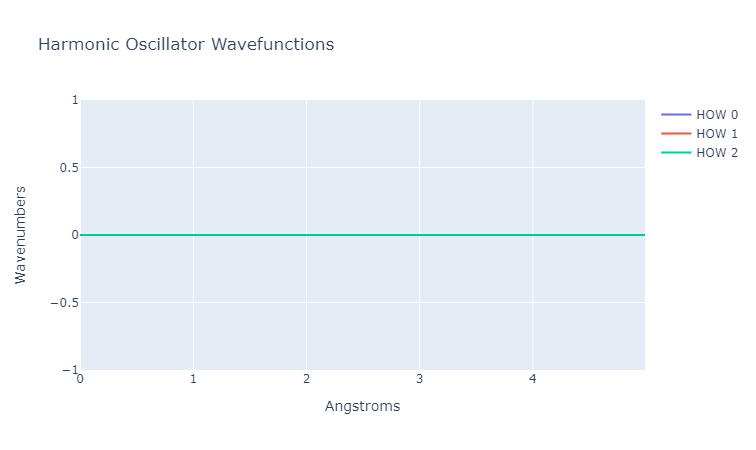

In [4]:
basisSize = 3
basis = []

#Build the basis set of the specified size
for n in range(basisSize):
    basis.append( newHOW(n) )

x = np.arange(0, 5, .01)

for index, b in enumerate(basis):
    
    y = []
    for r in x:
        y.append( float(b(r)) )
    
    figure["data"].append(
        {
            "x":x,
            #Convert to wavenumbers
            "y":y,#[yv * 2.2 * pow(10,4) for yv in y],
            "name":"HOW " + str(index)
        }
)

#Compute and display orthonormality of the basis set
overlap = np.zeros([basisSize, basisSize])

for row in tqdm(range(basisSize)):
    for col, b2 in enumerate(basis):
        integrand = lambda r : basis[row](r) * b2(r)
        overlap[row, col] += round(
            integrate(integrand, 0, np.inf, epsabs=pow(10,-5), epsrel=pow(10, -5), limit=pow(10,5))[0],
            7
        )

#Display the Overlap Table
display(Math("\mbox{Overlap Integral:} \int_{-\infty}^{\infty}{\psi_i \psi_j}<br>"))
display(Math( "\qquad\quad\;\;" + "\qquad".join([ "\psi_" + str(col) for col in range(len(basis))]) ))
for row in range(basisSize):
    display(Math("\psi_" + str(row) + "\qquad" + "\qquad".join([str(ovl) for ovl in overlap[row]]) ))

iplot(figure)

In [5]:
#Allow Notebook to Import from Comp_Chem_Package
import sys
sys.path.append("..\\Comp_Chem_Package")

#Harmonic Oscilator Basis Set Class Test
from basisSets import how as HOW

how = HOW(1.128323, 2169.81358, 12*16/(12+16), 100)

x, y = how.graphData(0, 5)

figure = {
    
    "data":[],
    "layout":
        {
           "xaxis":{"title":"Angstroms"},
           "yaxis":{"title":"Wavenumbers"},
           "title":{"text":"Harmonic Oscillator Wavefunctions"}
        },    
    
}

for index, yData in enumerate(y):
    figure["data"].append(
        {
            "x":x,
            "y":yData,
            "name":"HOW " + str(index)
        }
    )

iplot(figure)

ModuleNotFoundError: No module named 'basisSets'